In [2]:
!pip install yellowbrick


  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 112.6/282.6 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 194.6/282.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.4 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler #skala menjadi 0-1
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [6]:
data = pd.read_csv("Dataset-Tugas.csv")
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


EDA

In [8]:
data.drop(columns='class', inplace=True)

In [9]:
data.shape

(150, 4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [19]:
data.drop(columns='sepal length', inplace=True)

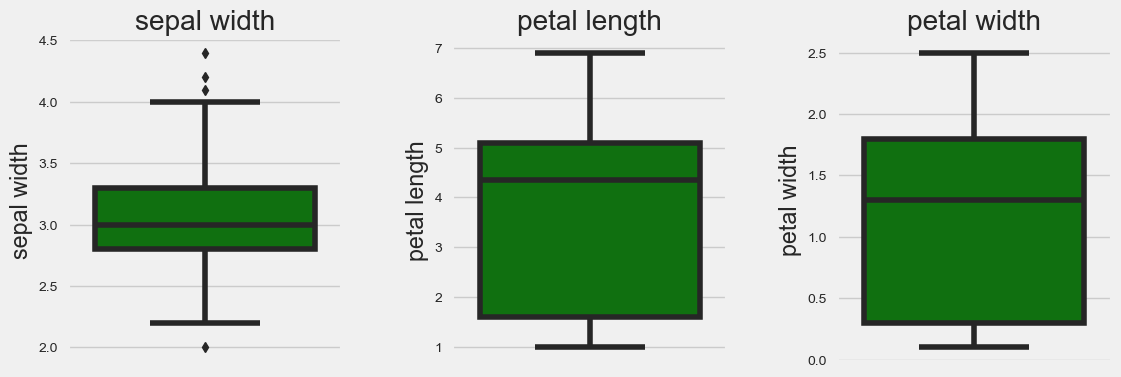

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
    # Definisikan variabel yang akan divisualisasikan
    variables = data.select_dtypes(exclude='object').columns

    # Buat figure dan axes untuk subplot dengan ukuran 1x3
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Sesuaikan ukuran figure
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Atur jarak antar subplot

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="green", ax=axes[i])  # Perhatikan perubahan di sini
        axes[i].set_title(var)  # Tambahkan judul untuk setiap plot

    # Tampilkan plot
    plt.show()

# Panggil fungsi box_plot dengan data yang sesuai
box_plot(data)

Pre-Processing

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sepal width'] = le.fit_transform(data['sepal width'])
data.head()

,sepal width,petal length,petal width
0,14,1.4,0.2
1,9,1.4,0.2
2,11,1.3,0.2
3,10,1.5,0.2
4,15,1.4,0.2


In [22]:
# instantiate
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.63636364, 0.06779661, 0.04166667],
       [0.40909091, 0.06779661, 0.04166667],
       [0.5       , 0.05084746, 0.04166667],
       [0.45454545, 0.08474576, 0.04166667],
       [0.68181818, 0.06779661, 0.04166667],
       [0.81818182, 0.11864407, 0.125     ],
       [0.59090909, 0.06779661, 0.08333333],
       [0.59090909, 0.08474576, 0.04166667],
       [0.36363636, 0.06779661, 0.04166667],
       [0.45454545, 0.08474576, 0.        ],
       [0.72727273, 0.08474576, 0.04166667],
       [0.59090909, 0.10169492, 0.04166667],
       [0.40909091, 0.06779661, 0.        ],
       [0.40909091, 0.01694915, 0.        ],
       [0.86363636, 0.03389831, 0.04166667],
       [1.        , 0.08474576, 0.125     ],
       [0.81818182, 0.05084746, 0.125     ],
       [0.63636364, 0.06779661, 0.08333333],
       [0.77272727, 0.11864407, 0.08333333],
       [0.77272727, 0.08474576, 0.08333333],
       [0.59090909, 0.11864407, 0.04166667],
       [0.72727273, 0.08474576, 0.125     ],
       [0.

MODELLING

1. K-Means

c:\Users\Ratih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ratih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ratih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ratih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

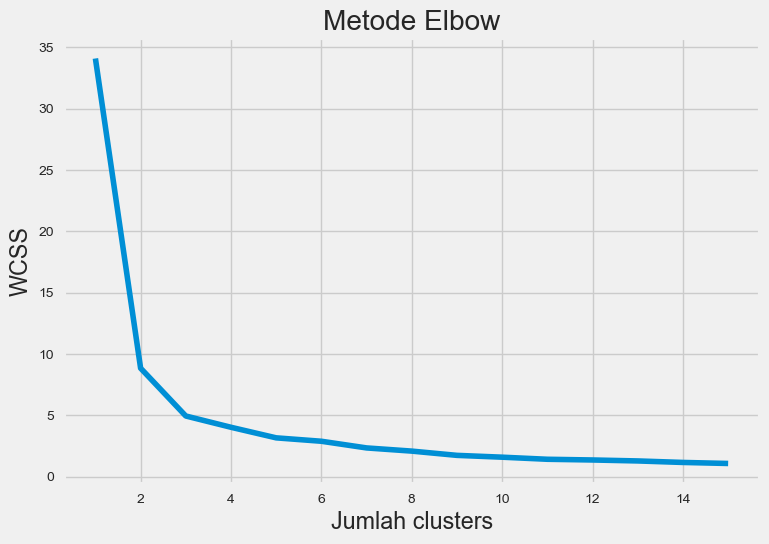

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

c:\Users\Ratih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


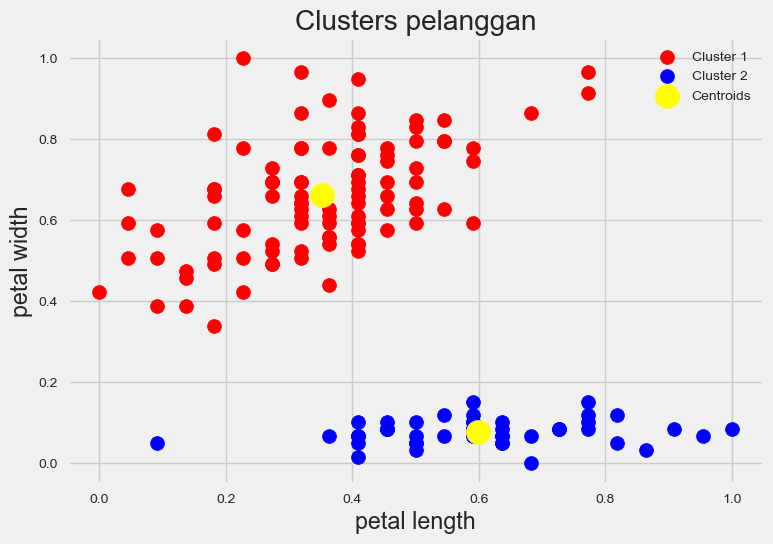

In [28]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0],  model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters pelanggan')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

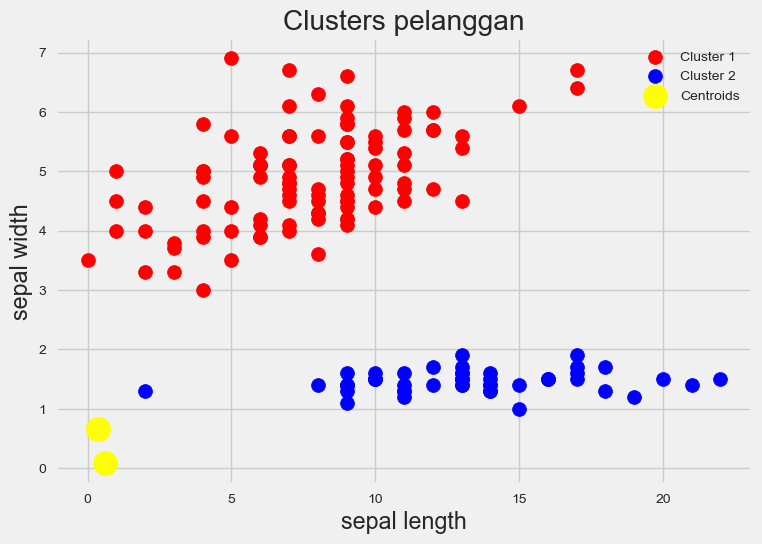

In [29]:
data['Hasil_cluster'] = model1.labels_
# Visualisasi hasil clusters
plt.scatter(data.values[y_pred1 == 0, 0], data.values[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(data.values[y_pred1 == 1, 0], data.values[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0],  model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters pelanggan')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

2. DB-Scan

In [30]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1,min_samples=10)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
# Tambahkan label tersebut menjadi kolom baru didataset
data['Hasil_cluster'] = model2.labels_
data.head()

,sepal width,petal length,petal width,Hasil_cluster
0,14,1.4,0.2,0
1,9,1.4,0.2,0
2,11,1.3,0.2,0
3,10,1.5,0.2,0
4,15,1.4,0.2,0


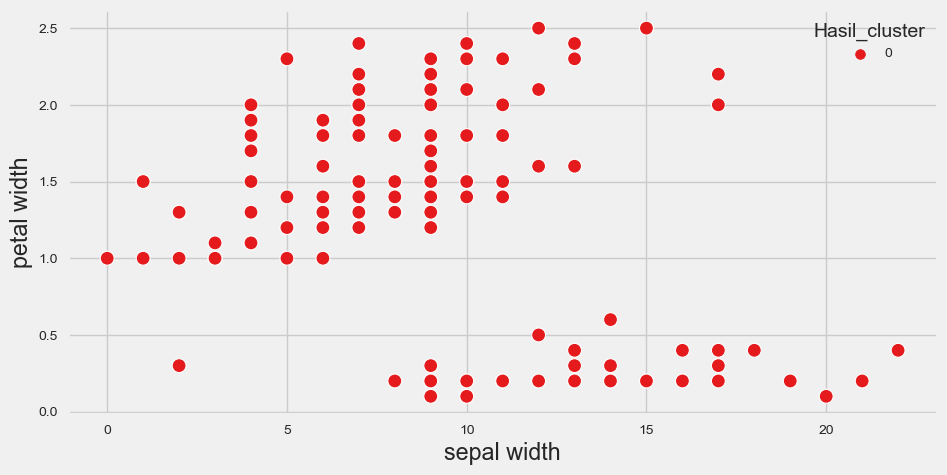

In [37]:
plt.figure(figsize=(10,5))

sns.scatterplot(x = 'sepal width', y = 'petal width',
                hue = 'Hasil_cluster', data = data, palette = 'Set1', s=100);

MATRIKS EVALUASI

1. Silhouette_score

In [38]:
# Menghitung Silhouette_score algoritma k-means
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print("Silhouette Score:", Evaluasi_KMeans)

Silhouette Score: 0.6657806110680987


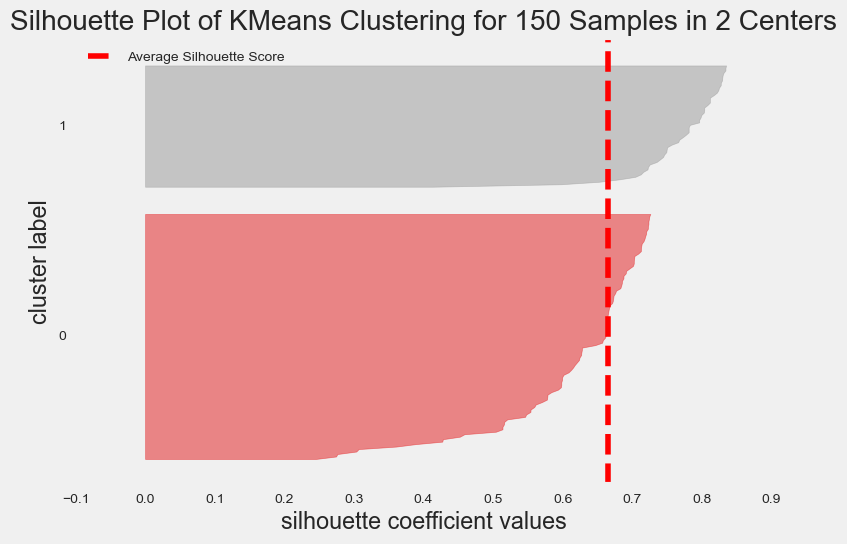

In [35]:
# Membuat silhouette vizualitation untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

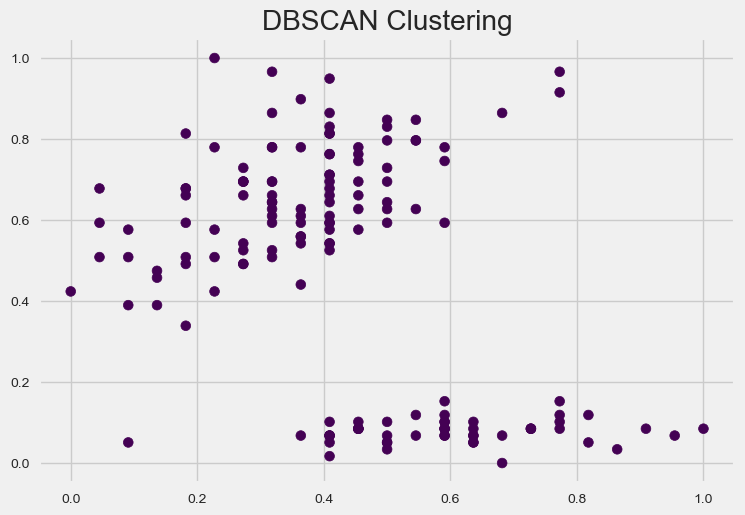

In [43]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred2, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()


2. Davies-Bouldin Index (DBI)

In [45]:
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Davies-Bouldin Index (DBI): 0.4474811155344457
